Classify Otto Group Product with Neural Networks

In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,...,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,...,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,...,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,Class_1


In [4]:
data.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
feat_5      int64
feat_6      int64
feat_7      int64
feat_8      int64
feat_9      int64
feat_10     int64
feat_11     int64
feat_12     int64
feat_13     int64
feat_14     int64
feat_15     int64
feat_16     int64
feat_17     int64
feat_18     int64
feat_19     int64
feat_20     int64
feat_21     int64
feat_22     int64
feat_23     int64
feat_24     int64
feat_25     int64
feat_26     int64
feat_27     int64
feat_28     int64
feat_29     int64
            ...  
feat_65     int64
feat_66     int64
feat_67     int64
feat_68     int64
feat_69     int64
feat_70     int64
feat_71     int64
feat_72     int64
feat_73     int64
feat_74     int64
feat_75     int64
feat_76     int64
feat_77     int64
feat_78     int64
feat_79     int64
feat_80     int64
feat_81     int64
feat_82     int64
feat_83     int64
feat_84     int64
feat_85     int64
feat_86     int64
feat_87     int64
feat_88     int64
feat_89   

Get the feature columns

In [5]:
columns = data.columns[1:-1]

In [6]:
X = data[columns]

In [7]:
y = np.ravel(data['target'])

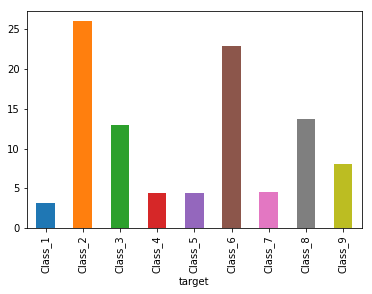

In [8]:
distribution = data.groupby('target').size() / data.shape[0] * 100.0
distribution.plot(kind='bar')
plt.show()

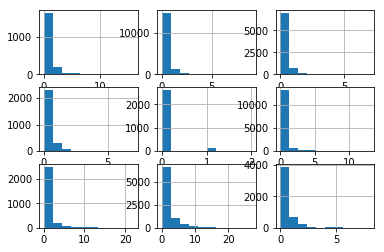

In [9]:
for id in range(9):
    plt.subplot(3, 3, id + 1) 
    # plt.axis('off') 
    data[data.target == 'Class_' + str(id + 1)].feat_20.hist()
plt.show()    

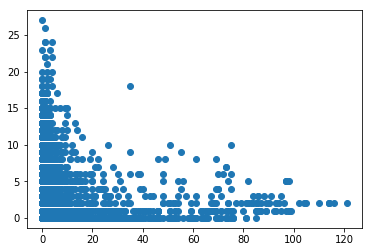

In [10]:
plt.scatter(data.feat_19, data.feat_20)
plt.show()

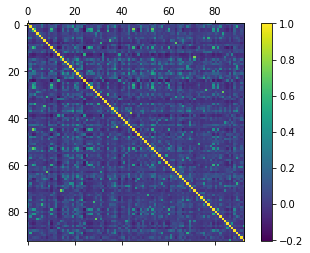

In [11]:
# show relationship between all pairs of features
# correlation

fig = plt.figure()
ax = fig.add_subplot(111) # 1 row, 1 col, 1st plot
cax = ax.matshow(X.corr(), interpolation='nearest')
fig.colorbar(cax)
plt.show()

In [12]:
num_fea = X.shape[1]

Initialize neural networks

In [13]:
#alpha is L-2 regularization coefficient
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (30, 10), random_state = 1, verbose = True)

Train model

In [14]:
model.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [15]:
model.intercepts_

[array([ 0.99089014,  0.39899377,  0.58375556, -0.01240558,  0.94042826,
         0.06713607,  0.8660819 ,  0.03933946,  1.08831245,  0.328561  ,
         0.6326531 ,  0.49677011,  0.58919954,  0.10164883,  0.18719977,
         0.41438814,  0.58573905,  0.52098425,  0.60182913,  0.21844643,
         0.9060106 ,  1.9345901 ,  0.99029877, -0.00420391, -0.0029445 ,
         1.23287115,  0.00867776,  0.53280329,  0.52853497,  0.56507593]),
 array([ 1.57078432,  1.02437355,  0.90418075, -0.14098321,  0.17574008,
         0.48424624,  1.19067115,  0.49642974,  0.48166267,  1.09758975]),
 array([-0.16850612,  1.0429527 ,  0.36439466, -1.41101684,  0.06395532,
        -0.15830358,  1.42860635,  0.83679167, -1.50037161])]

In [16]:
print(model.coefs_[0].shape)
print(model.coefs_[1].shape)
print(model.coefs_[2].shape)

(93, 30)
(30, 10)
(10, 9)


In [17]:
pred = model.predict(X)
pred

array(['Class_6', 'Class_8', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype='<U7')

Print score

In [18]:
model.score(X, y)

0.8017712272536281

In [19]:
sum(pred == y) / len(y)

0.8017712272536281

Make prediction on testing data

In [21]:
test_data = pd.read_csv('test.csv')
Xtest = test_data[test_data.columns[1:]]
Xtest

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
5,0,0,0,0,0,0,0,0,17,0,...,0,0,1,1,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,5,...,0,3,0,0,1,0,18,1,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5,0,0,0,0,0
9,0,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_prob = model.predict_proba(Xtest)

Export result to otto_prediction.tsv

In [23]:
solution = pd.DataFrame(test_prob, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])


In [24]:
solution['id'] = test_data['id']
cols = solution.columns.tolist()
cols = cols[-1:] + cols[:-1]
solution = solution[cols]

In [25]:
solution.to_csv('otto_prediction.tsv', index = False)